In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
zomato = pd.read_excel(r"C:\Users\LENOVO\Desktop\Excelr\Projects\excelr\Zomato\Zomata.xlsx", sheet_name=0)
country = pd.read_excel(r"C:\Users\LENOVO\Desktop\Excelr\Projects\excelr\Zomato\DA -P198. Final Project Submission Group  7\Excel Zomato.xlsx", sheet_name=1)
currency = pd.read_excel(r"C:\Users\LENOVO\Desktop\Excelr\Projects\excelr\Zomato\DA -P198. Final Project Submission Group  7\Excel Zomato.xlsx", sheet_name=2)

# Explotary data analysis

### Zomato

In [3]:
zomato.head()

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Datekey_Opening
0,18435314,Punjabi's Veg Grill,1,New Delhi,"13/288 , 14 Block Gurudwra, Geeta Colony, New ...",Geeta Colony,"Geeta Colony, New Delhi",77.276769,28.650775,North Indian,Indian Rupees(Rs.),No,No,No,No,1,0,300,1.0,2013_9_21
1,18378015,Tasty Tandoor,1,New Delhi,"726/2, Jheel Khuranja, Geeta Colony, New Delhi",Geeta Colony,"Geeta Colony, New Delhi",77.275052,28.658216,North Indian,Indian Rupees(Rs.),No,No,No,No,1,0,200,1.0,2016_9_10
2,18424905,Taste of Spice,1,New Delhi,"C-222, Lajpat Nagar 1, New Delhi",Lajpat Nagar 1,"Lajpat Nagar 1, New Delhi",77.241312,28.578311,North Indian,Indian Rupees(Rs.),No,Yes,No,No,1,0,400,1.0,2018_9_25
3,18180072,Kolcata Bengali Dhaba,1,New Delhi,"Gali 7, Mahipalpur, New Delhi",Mahipalpur,"Mahipalpur, New Delhi",77.123932,28.543587,North Indian,Indian Rupees(Rs.),No,No,No,No,1,0,100,1.0,2018_9_6
4,18415377,Sunil Punjabi Dhaba,1,New Delhi,"Main Vasant Kunj Road, Mahipalpur, New Delhi",Mahipalpur,"Mahipalpur, New Delhi",77.129706,28.541369,North Indian,Indian Rupees(Rs.),No,No,No,No,1,0,150,1.0,2013_9_17


In [4]:
#number of (rows,columns)
zomato.shape

(9551, 20)

In [5]:
#checking for null values
# Cuisines column has 9 null values
zomato.isnull().sum()

RestaurantID            0
RestaurantName          0
CountryCode             0
City                    0
Address                 0
Locality                0
LocalityVerbose         0
Longitude               0
Latitude                0
Cuisines                9
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Votes                   0
Average_Cost_for_two    0
Rating                  0
Datekey_Opening         0
dtype: int64

In [63]:
# Null values in cuisines column
zomato[zomato['Cuisines'].isnull()]

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,...,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Datekey_Opening,cost_bucket,average_rating


In [7]:
#Removing all the rows with Null values 
zomato = zomato.dropna(axis=0,how='any')


In [8]:
zomato.shape

(9542, 20)

In [9]:
zomato.columns

Index(['RestaurantID', 'RestaurantName', 'CountryCode', 'City', 'Address',
       'Locality', 'LocalityVerbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has_Table_booking', 'Has_Online_delivery',
       'Is_delivering_now', 'Switch_to_order_menu', 'Price_range', 'Votes',
       'Average_Cost_for_two', 'Rating', 'Datekey_Opening'],
      dtype='object')

In [10]:
# This column is dates but it is not in correct format
zomato['Datekey_Opening']

0        2013_9_21
1        2016_9_10
2        2018_9_25
3         2018_9_6
4        2013_9_17
           ...    
9546     2011_10_3
9547     2013_10_1
9548    2017_10_28
9549    2015_10_23
9550     2015_10_4
Name: Datekey_Opening, Length: 9542, dtype: object

In [11]:
# converting dates to date format
zomato['Datekey_Opening'] = pd.to_datetime(zomato['Datekey_Opening'],format = '%Y_%m_%d')

In [12]:
#Datekey_Opening column has been converted to datetime datatype
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9542 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   RestaurantID          9542 non-null   int64         
 1   RestaurantName        9542 non-null   object        
 2   CountryCode           9542 non-null   int64         
 3   City                  9542 non-null   object        
 4   Address               9542 non-null   object        
 5   Locality              9542 non-null   object        
 6   LocalityVerbose       9542 non-null   object        
 7   Longitude             9542 non-null   float64       
 8   Latitude              9542 non-null   float64       
 9   Cuisines              9542 non-null   object        
 10  Currency              9542 non-null   object        
 11  Has_Table_booking     9542 non-null   object        
 12  Has_Online_delivery   9542 non-null   object        
 13  Is_delivering_now 

In [13]:
#creating cost bucket column based on 'Average_Cost_for_two'

bins = [-np.inf,100,500,1000,np.inf]
labels = ['<100','100-500','500-1000','>1000']
zomato['cost_bucket'] = pd.cut(zomato['Average_Cost_for_two'],bins=bins,labels=labels)

In [14]:
#creating average rating column based on 'Rating'
bins = [0,1,2,3,4,5]
labels = [1,2,3,4,5]
zomato['average_rating'] = pd.cut(zomato['Rating'],bins=bins,labels=labels)

In [15]:
# Merging Country and Currency DataFrame with zomato DataFrame
# Renaming column in Country DataFrame to match the zomato DataFrame
country.rename(columns={'CountryID':'CountryCode'},inplace=True)

In [16]:
final_df = pd.merge(zomato,country, on='CountryCode', how='left')
final_df = pd.merge(final_df,currency,on='Currency', how='left')
final_df.head(3)

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,...,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Datekey_Opening,cost_bucket,average_rating,Countryname,USD Rate
0,18435314,Punjabi's Veg Grill,1,New Delhi,"13/288 , 14 Block Gurudwra, Geeta Colony, New ...",Geeta Colony,"Geeta Colony, New Delhi",77.276769,28.650775,North Indian,...,No,1,0,300,1.0,2013-09-21,100-500,1,India,0.012
1,18378015,Tasty Tandoor,1,New Delhi,"726/2, Jheel Khuranja, Geeta Colony, New Delhi",Geeta Colony,"Geeta Colony, New Delhi",77.275052,28.658216,North Indian,...,No,1,0,200,1.0,2016-09-10,100-500,1,India,0.012
2,18424905,Taste of Spice,1,New Delhi,"C-222, Lajpat Nagar 1, New Delhi",Lajpat Nagar 1,"Lajpat Nagar 1, New Delhi",77.241312,28.578311,North Indian,...,No,1,0,400,1.0,2018-09-25,100-500,1,India,0.012


In [17]:
#creating average cost in usd column
final_df['Average_cost_USD'] = final_df['Average_Cost_for_two']*final_df['USD Rate']


In [18]:
# Checking to See if final_df has any Null values
final_df.isnull().sum()

RestaurantID            0
RestaurantName          0
CountryCode             0
City                    0
Address                 0
Locality                0
LocalityVerbose         0
Longitude               0
Latitude                0
Cuisines                0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Votes                   0
Average_Cost_for_two    0
Rating                  0
Datekey_Opening         0
cost_bucket             0
average_rating          0
Countryname             0
USD Rate                0
Average_cost_USD        0
dtype: int64

In [43]:
#Number of country, city and Cuisines
final_df[['CountryCode','City','Cuisines']].nunique().rename({'CountryCode':'Countries','City':'Cities'})

Countries      15
Cities        140
Cuisines     1825
dtype: int64

# Data Analysis

In [20]:
# count of Restaurants by Country
country_count = final_df.groupby(['Countryname']).agg({'RestaurantName':'size'}).reset_index().sort_values('RestaurantName',ascending=False)
country_count

,Countryname,RestaurantName
3,India,8652
14,United States,425
13,United Kingdom,80
1,Brazil,60
9,South Africa,60
12,United Arab Emirates,60
5,New Zealand,40
11,Turkey,34
0,Australia,24
6,Phillipines,22


Text(0.5, 1.0, 'Number of Restaurants by Country')

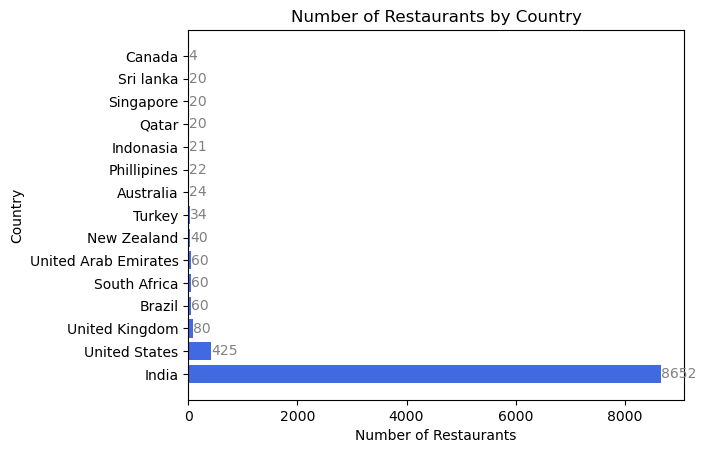

In [21]:
plt.barh(country_count['Countryname'],country_count['RestaurantName'],color='royalblue')

for i,v in enumerate(country_count['RestaurantName']):
    plt.text(v, i, str(v), va='center', fontsize=10, color='grey')
    
plt.xlabel('Number of Restaurants')
plt.ylabel('Country')
plt.title('Number of Restaurants by Country')

In [45]:
#Count of restaurant based on average rating
avgrat = final_df.groupby(['average_rating']).agg({'RestaurantName':'size'})
avgrat

,RestaurantName
average_rating,
1,2148
2,10
3,1891
4,4381
5,1112


Text(0, 0.5, 'Count of Restaurants')

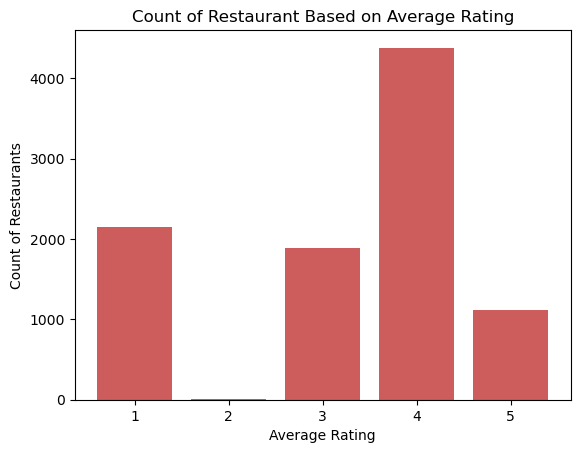

In [23]:
fig,ax=plt.subplots()
bars=ax.bar(avgrat.index,avgrat['RestaurantName'],color='indianred')

plt.title('Count of Restaurant Based on Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Count of Restaurants')

In [24]:
#Count of restaurant based on cost buckets
cstbuc = final_df.groupby(['cost_bucket']).agg({'RestaurantName':'size'})
cstbuc

,RestaurantName
cost_bucket,
<100,1027
100-500,5038
500-1000,2302
>1000,1175


Text(0, 0.5, 'Count of Restaurants')

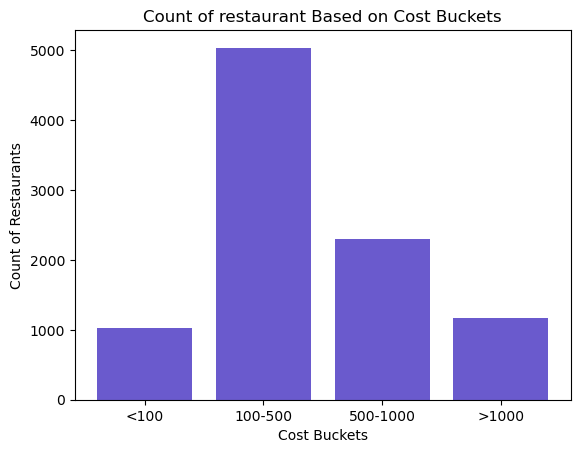

In [25]:
plt.bar(cstbuc.index,cstbuc['RestaurantName'],color='slateblue')
plt.title('Count of restaurant Based on Cost Buckets')
plt.xlabel('Cost Buckets')
plt.ylabel('Count of Restaurants')

In [26]:
#Percentage of Resturants based on "Has_Table_booking" and Percentage of Resturants based on "Has_Online_delivery"

htb = ((final_df.groupby(['Has_Table_booking']).agg({'RestaurantName':'count'}))/final_df['Has_Table_booking'].count()*100).rename(columns={'RestaurantName':'Count'})
hod = (final_df.groupby(['Has_Online_delivery']).agg({'RestaurantName':'count'})/final_df['Has_Online_delivery'].count()*100).rename(columns={'RestaurantName':'Count'})

print('Percentage of restaurants having table booking',htb['Count'])
print('Percentage of restaurant having onling delivery', hod['Count'])



Percentage of restaurants having table booking Has_Table_booking
No     87.864179
Yes    12.135821
Name: Count, dtype: float64
Percentage of restaurant having onling delivery Has_Online_delivery
No     74.313561
Yes    25.686439
Name: Count, dtype: float64


Text(0.5, 1.0, 'Percent of Restaurants having table booking')

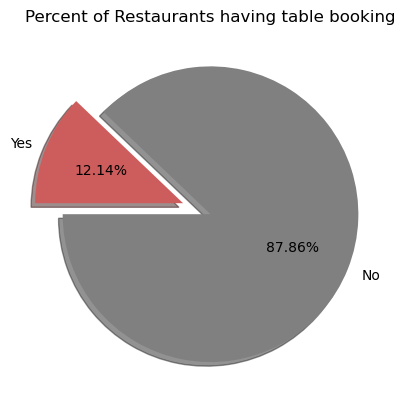

In [27]:
explode=[0,0.2]
colors=['grey','indianred']
plt.pie(htb['Count'],labels=htb.index,startangle= 180, explode=explode, shadow=True, colors=colors, autopct='%1.2f%%')
plt.title('Percent of Restaurants having table booking')

Text(0.5, 1.0, 'Percent of Restaurants having Online Delivery')

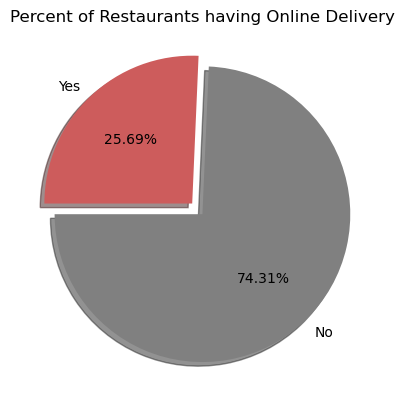

In [28]:
explode=[0,0.1]
colors=['grey','indianred']
plt.pie(hod['Count'],labels=htb.index,startangle= 180, explode=explode, shadow=True, colors=colors, autopct='%1.2f%%')
plt.title('Percent of Restaurants having Online Delivery')

In [29]:
#count of restaurant based on price range

prrn = final_df.groupby(['Price_range']).agg({'RestaurantName':'count'})
prrn

,RestaurantName
Price_range,
1,4438
2,3113
3,1405
4,586


In [30]:
# country by average cost in USD
avgusd = final_df.groupby(['Countryname']).agg({'Average_cost_USD':'mean'})
avgusd = avgusd.sort_values('Average_cost_USD',ascending=True)
avgusd

,Average_cost_USD
Countryname,
Turkey,4.242647
India,7.480444
Sri lanka,8.075000
Indonasia,18.839762
South Africa,21.406400
Australia,24.083333
United States,26.352941
Brazil,26.933333
Canada,36.250000


Text(0.5, 1.0, 'Number of Restaurants by Country')

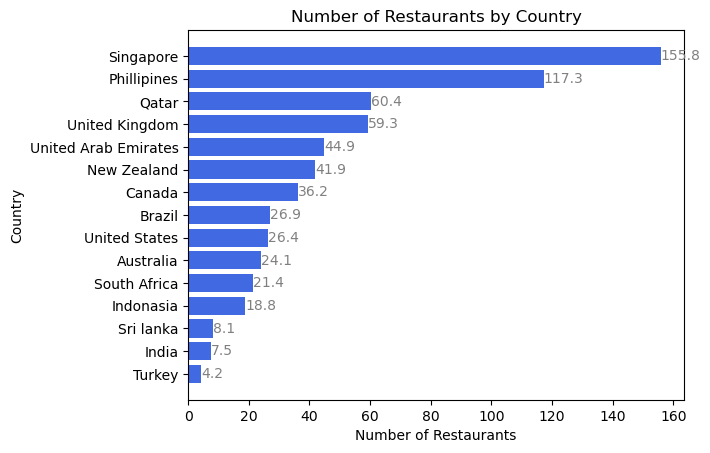

In [31]:
plt.barh(avgusd.index,avgusd['Average_cost_USD'],color='royalblue')

for i,v in enumerate(avgusd['Average_cost_USD']):
    rounded = float(round(v,1))
    plt.text(v, i, rounded, va='center', fontsize=10, color='grey')
    
plt.xlabel('Number of Restaurants')
plt.ylabel('Country')
plt.title('Number of Restaurants by Country')

In [32]:
#top 10 most popular cuisines
popcui = final_df.groupby(['Cuisines']).agg({'RestaurantName':'count'}).nlargest(10,'RestaurantName')
popcui

,RestaurantName
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
Cafe,299
Bakery,218
"North Indian, Mughlai, Chinese",197
"Bakery, Desserts",170


Text(0.5, 1.0, 'Top 10 Most Popular Cuisines')

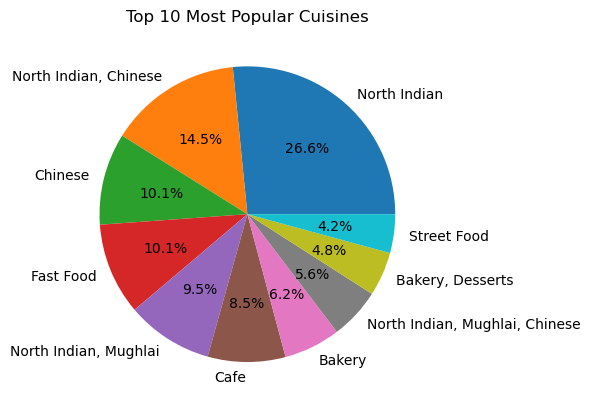

In [33]:
plt.pie(popcui['RestaurantName'],labels=popcui.index,autopct='%1.1f%%')
plt.title('Top 10 Most Popular Cuisines')

In [53]:
# on average 5 most expensive Cuisines
expcui = final_df.groupby(['Cuisines'])[['Average_cost_USD']].mean().nlargest(5,'Average_cost_USD')
expcui

,Average_cost_USD
Cuisines,
"French, Mediterranean, European",500.0
"European, Asian, Indian",438.0
"Chinese, Continental, Singaporean",300.0
"Chinese, Seafood, Cantonese, Dim Sum",300.0
"Seafood, Asian, Filipino, Indian",292.0


Text(0.5, 1.0, 'Top 5 most Expensive Cuisines in USD')

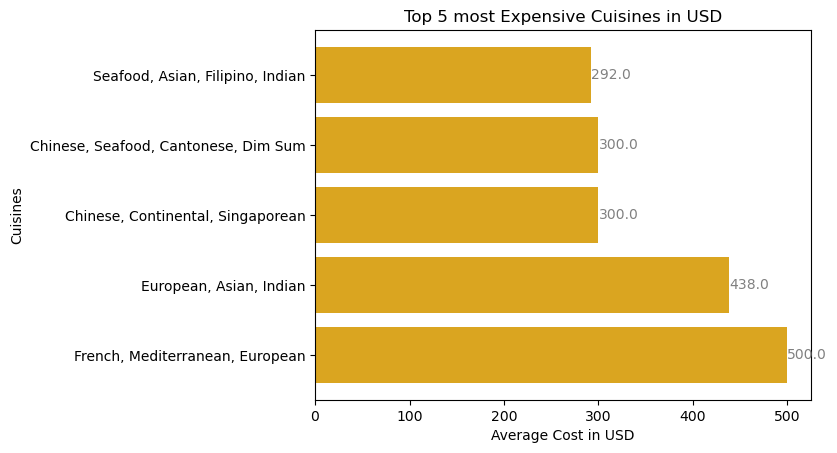

In [35]:
plt.barh(expcui.index,expcui['Average_cost_USD'],color='goldenrod')

for i,v in enumerate(expcui['Average_cost_USD']):
    plt.text(v,i,v,fontsize=10, va='center', color='grey')
    
plt.xlabel('Average Cost in USD')
plt.ylabel('Cuisines')
plt.title('Top 5 most Expensive Cuisines in USD')

In [36]:
#Restaurant opening by month and year

def indian_financial_month(date):
    if date.month >3:
        return date.month - 3
    else:
        return date.month + 9
final_df['indian_month'] = final_df['Datekey_Opening'].apply(indian_financial_month)

In [37]:
# count of restaurant opening per indian financial month
cntmt = final_df.groupby(final_df['Datekey_Opening'].apply(indian_financial_month)).agg({'RestaurantName':'count'}).rename_axis('Month').reset_index()
cntmt

,Month,RestaurantName
0,1,797
1,2,780
2,3,815
3,4,826
4,5,796
5,6,835
6,7,800
7,8,779
8,9,787
9,10,745


In [57]:
cntyr = final_df.groupby(final_df['Datekey_Opening'].dt.year).agg({'RestaurantName':'count'}).rename_axis('Year').reset_index()
cntyr

,Year,RestaurantName
0,2010,1079
1,2011,1096
2,2012,1022
3,2013,1059
4,2014,1049
5,2015,1023
6,2016,1026
7,2017,1086
8,2018,1102
